In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

In [ ]:
house_dataset = sklearn.datasets.fetch_california_housing()

In [ ]:
print(house_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [ ]:
# Loading the dataset to a Pandas DataFrame
house_dataset_dataframe = pd.DataFrame(house_dataset.data,columns=house_dataset.feature_names)

In [ ]:
house_dataset_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
house_dataset_dataframe['houseprice'] = house_dataset.target

In [ ]:
house_dataset_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,houseprice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Check for missing values
house_dataset_dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
houseprice,0


In [ ]:
# Checking the number of rows and Columns in the data frame
house_dataset_dataframe.shape

(20640, 9)

In [ ]:
# Statistical measures of the dataset
house_dataset_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,houseprice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
# Understanding the correlation between various features in the dataset
correlation = house_dataset_dataframe.corr()

In [ ]:
print(correlation)

              MedInc  HouseAge  AveRooms  AveBedrms  ...  AveOccup  Latitude  Longitude  houseprice
MedInc      1.000000 -0.119034  0.326895  -0.062040  ...  0.018766 -0.079809  -0.015176    0.688075
HouseAge   -0.119034  1.000000 -0.153277  -0.077747  ...  0.013191  0.011173  -0.108197    0.105623
AveRooms    0.326895 -0.153277  1.000000   0.847621  ... -0.004852  0.106389  -0.027540    0.151948
AveBedrms  -0.062040 -0.077747  0.847621   1.000000  ... -0.006181  0.069721   0.013344   -0.046701
Population  0.004834 -0.296244 -0.072213  -0.066197  ...  0.069863 -0.108785   0.099773   -0.024650
AveOccup    0.018766  0.013191 -0.004852  -0.006181  ...  1.000000  0.002366   0.002476   -0.023737
Latitude   -0.079809  0.011173  0.106389   0.069721  ...  0.002366  1.000000  -0.924664   -0.144160
Longitude  -0.015176 -0.108197 -0.027540   0.013344  ...  0.002476 -0.924664   1.000000   -0.045967
houseprice  0.688075  0.105623  0.151948  -0.046701  ... -0.023737 -0.144160  -0.045967    1.000000


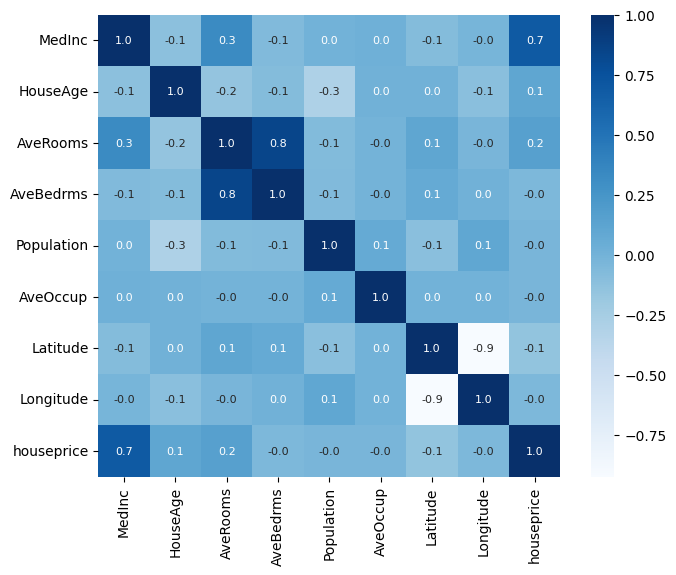

In [ ]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(8,6))
sns.heatmap(correlation,cbar=True,annot=True,square=True,fmt='.1f',annot_kws={'size':8},cmap='Blues')
plt.show()

In [ ]:
# Splitting the data and Target
X = house_dataset_dataframe.drop(columns=['houseprice'],axis=1)
Y = house_dataset_dataframe['houseprice']

In [ ]:
print(X)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25
...       ...       ...       ...        ...         ...       ...       ...        ...
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43    -121.32
20639  2.3886      16.0  5.25471

In [ ]:
print(Y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: houseprice, Length: 20640, dtype: float64


In [ ]:
print(X.shape,Y.shape)

(20640, 8) (20640,)


In [ ]:
# Splitting the data into Training data and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [ ]:
print(X_train)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
14884  3.7583      37.0  5.661098   1.059666      1056.0  2.520286     32.63    -117.07
1519   4.4561      28.0  5.464368   1.078161      1068.0  2.455172     37.92    -122.08
10018  5.2359       9.0  6.703349   1.069378       955.0  2.284689     39.23    -121.20
9701   2.5263      34.0  4.463196   1.005386      2443.0  4.385996     36.67    -121.63
11484  3.1912      20.0  3.894737   1.082007      1770.0  2.166463     33.73    -117.99
...       ...       ...       ...        ...         ...       ...       ...        ...
6400   3.7350      23.0  4.886228   1.091317      1475.0  2.208084     34.13    -118.05
15288  3.5341      15.0  5.681710   1.059382       747.0  1.774347     33.10    -117.31
11513  4.9044      24.0  4.881890   1.165354       513.0  2.019685     33.72    -118.07
1688   6.0289      23.0  7.289030   1.010549      1375.0  2.900844     37.98    -122.27
5994   3.7958      33.0  5.69679

In [ ]:
print(Y_train)

14884    1.45500
1519     2.50000
10018    2.13300
9701     1.30400
11484    2.20800
          ...   
6400     2.18300
15288    5.00001
11513    4.85000
1688     2.18600
5994     1.52500
Name: houseprice, Length: 16512, dtype: float64


In [ ]:
print(X_test)

        MedInc  HouseAge    AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
9491    3.5917      22.0    5.410526   1.021053       821.0  2.880702     39.21    -123.19
11843   2.9559      15.0    5.272152   1.110759       816.0  2.582278     39.96    -120.93
11271   3.2857      21.0    3.945827   1.035139      1888.0  2.764275     33.79    -117.99
19219   3.0568      19.0    4.267898   0.988453      1130.0  2.609700     38.47    -122.67
14356   3.3456      11.0    3.895023   1.126697      1960.0  1.773756     32.75    -117.23
...        ...       ...         ...        ...         ...       ...       ...        ...
16911  11.6833      21.0    8.497636   1.033097      2440.0  2.884161     37.56    -122.37
16881   6.2306      22.0    5.749478   0.995825      1163.0  2.427975     37.59    -122.40
956     7.3160      13.0    6.694097   0.992844      1590.0  2.844365     37.69    -121.92
1979    4.6250      34.0  132.533333  34.066667        36.0  2.400000     38.80    -120.08

In [ ]:
print(Y_test)

9491     1.18800
11843    1.18800
11271    2.13300
19219    1.90300
14356    1.59800
          ...   
16911    5.00001
16881    5.00001
956      2.85400
1979     1.62500
1286     1.27000
Name: houseprice, Length: 4128, dtype: float64


In [ ]:
print(X.shape, Y.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(20640, 8) (20640,) (16512, 8) (4128, 8) (16512,) (4128,)


In [ ]:
# Model Training using XGBRegressor
model = XGBRegressor()

In [ ]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Evaluation
training_data_prediction = model.predict(X_train)

In [ ]:
print(training_data_prediction)

[1.4162256 2.229103  2.2865145 ... 3.916217  2.5457225 1.5509608]


In [ ]:
# Measure Error for training data
error1 = metrics.r2_score(Y_train,training_data_prediction)
error2 = metrics.mean_absolute_error(Y_train,training_data_prediction)
print("R squared error : ", error1)
print('Mean Absolute Error : ', error2)

R squared error :  0.9439154002012755
Mean Absolute Error :  0.19333650655515577


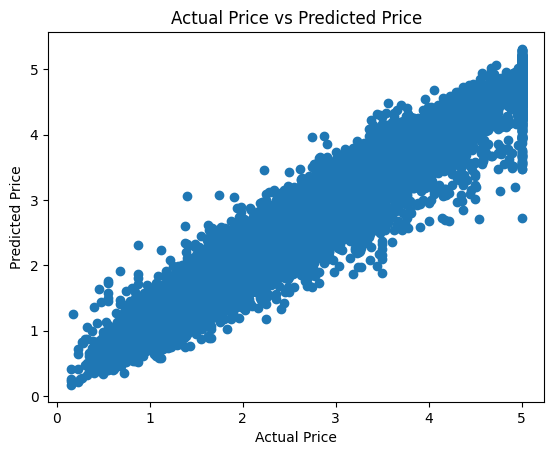

In [ ]:
# Data visualization for training data
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [ ]:
# Accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

[1.2560753  0.94234014 1.9757392  ... 3.2985308  2.983024   1.4041145 ]


In [ ]:
# Measure Error for testing data
error3 = metrics.r2_score(Y_test,test_data_prediction)
error4 = metrics.mean_absolute_error(Y_test,test_data_prediction)
print("R squared error : ", error3)
print('Mean Absolute Error : ', error4)

R squared error :  0.8386188269983407
Mean Absolute Error :  0.3008583316724222


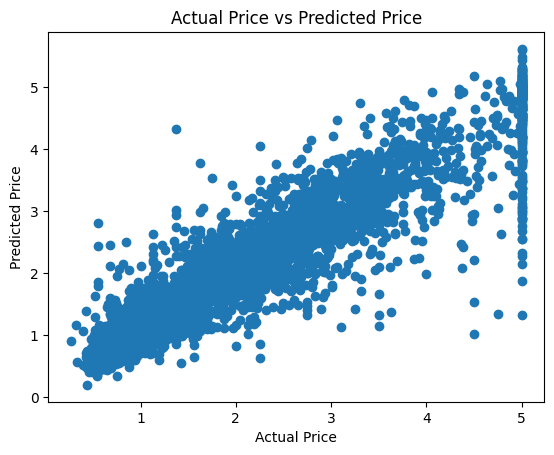

In [ ]:
# Data visualization for testing data
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [ ]:
# For taking testing data from user
# def user_input():
#   features = {
#       'MedInc':float(input("Enter median income in block group:")),
#       'HouseAge':float(input("Enter the house age:")),
#       'AveRooms':float(input("Enter average number of rooms per household:")),
#       'AveBedrms':float(input("Enter average number of bedrooms per household:")),
#       'Population':float(input("Enter block group population:")),
#       'AveOccup':float(input("Enter average number of household members:")),
#       'Latitude':float(input("Enter block group latitude:")),
#       'Longitude':float(input("Enter block group longitude:"))
#   }
#   return pd.DataFrame(features,index=[0])

In [ ]:
# For taking valid input from user
def get_valid_user_input():
    while True:
        MedInc = float(input("Enter median income in block group:"))
        HouseAge = float(input("Enter the house age:"))
        AveRooms = float(input("Enter average number of rooms per household:"))
        AveBedrms = float(input("Enter average number of bedrooms per household:"))
        Population = float(input("Enter block group population:"))
        AveOccup = float(input("Enter average number of household members:"))
        Latitude = float(input("Enter block group latitude:"))
        Longitude = float(input("Enter block group longitude:"))

        if MedInc < 0 or HouseAge < 0 or AveRooms < 0 or AveBedrms < 0 or Population < 0 or AveOccup < 0:
            print("Error: MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup values must be non-negative. Please enter the values again.\n")
            continue
        else:
            features = {
                'MedInc': MedInc,
                'HouseAge': HouseAge,
                'AveRooms': AveRooms,
                'AveBedrms': AveBedrms,
                'Population': Population,
                'AveOccup': AveOccup,
                'Latitude' : Latitude,
                'Longitude' : Longitude
            }
            return pd.DataFrame(features,index=[0])

In [ ]:
# Make Prediction
def predict_house_price(userinput):
  predict_price = model.predict(userinput)
  return predict_price[0]

In [ ]:
userinput = get_valid_user_input()
price = predict_house_price(userinput)
print(f"The predicted house price is : {price:.2f} thousands of dollars")

Enter median income in block group:-4
Enter the house age:-5
Enter average number of rooms per household:8
Enter average number of bedrooms per household:7
Enter block group population:9
Enter average number of household members:5
Enter block group latitude:36.96
Enter block group longitude:-120.36
Error: MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup values must be non-negative. Please enter the values again.

Enter median income in block group:10
Enter the house age:7
Enter average number of rooms per household:6
Enter average number of bedrooms per household:4
Enter block group population:9
Enter average number of household members:12
Enter block group latitude:36.96
Enter block group longitude:-120.93
The predicted house price is : 3.35 thousands of dollars
